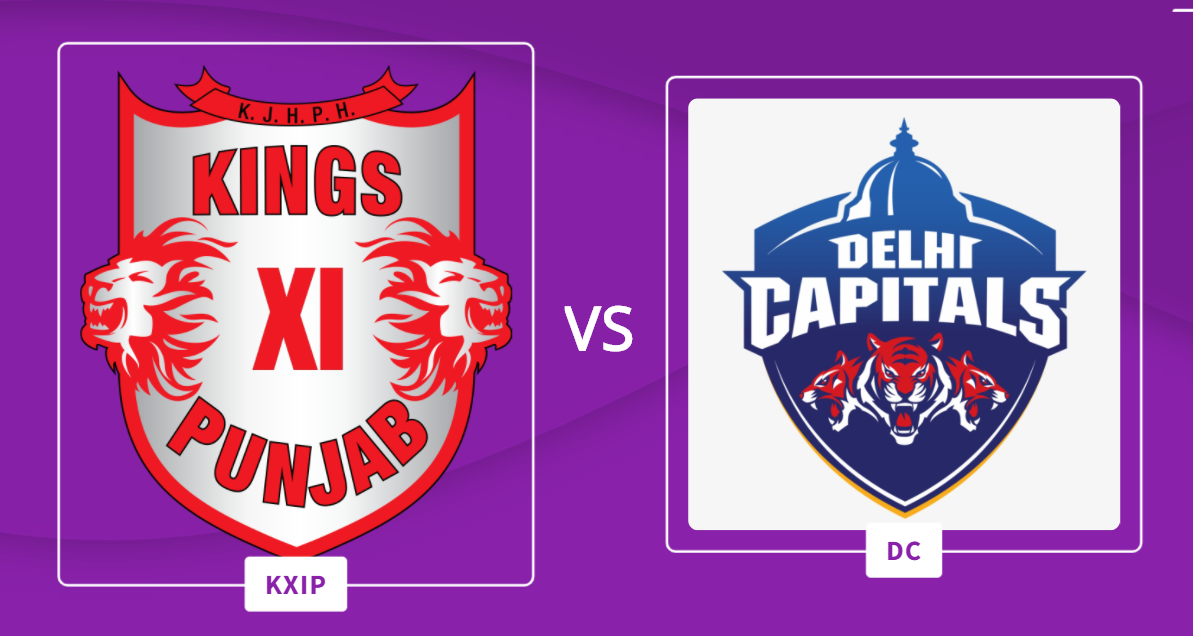

In [156]:
!pip install xgboost
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

pd.set_option('display.max_columns', 50)

In [157]:
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")
#deliveries.batsman.unique()

In [374]:
DC_batsmen  = ['P Shaw', 'S Dhawan', 'AM Rahane', 'SS Iyer', 'MP Stoinis', 'AR Patel', 'RR Pant']
DC_bowlers = ['K Rabada', 'HV Patel', 'AR Patel', 'R Ashwin', 'MP Stoinis']
# No data for Nortje, T Deshpande

KXIP_bowlers = ['Mohammed Shami', 'A Singh', 'CJ Jordan', 'M Ashwin','GJ Maxwell','DJ Hooda']
KXIP_batsmen = ['KL Rahul', 'MA Agarwal', 'CH Gayle', 'N Pooran', 'GJ Maxwell','DJ Hooda', 'CJ Jordan']

# Question 2: What will KL Rahul's strike rate be in first 6 overs?

## 2.1 : KL Rahul's strike rate in IPL

In [375]:
KL = deliveries[deliveries.batsman == "KL Rahul"]
KL_SR = KL.groupby(['match_id'])['batsman_runs'].count().reset_index(name = 'balls_faced')
temp_KL = KL.groupby(['match_id'])['batsman_runs'].sum().reset_index(name = 'total_runs')
KL_SR["total_runs"] = temp_KL.total_runs
KL_SR["strike_rate"] = (KL_SR.total_runs)*100/KL_SR.balls_faced

fig = px.bar(KL_SR, x=KL_SR.index, y='strike_rate',
             hover_data=['match_id','balls_faced', 'total_runs','strike_rate', ], color='strike_rate',title='Strike rate of KL Rahul in IPL')
fig.show()
print("#######################################################################################################################")
print("Average strike rate of KL Rahul in IPL is :", ((KL_SR.total_runs.sum())*100)/KL_SR.balls_faced.sum())
print("#######################################################################################################################")
print("Strike rates when balls faced were less than 10\n", KL_SR[KL_SR.balls_faced < 10])
print("#######################################################################################################################")
print("Strike rates when balls faced were between 10-20\n", KL_SR[(KL_SR.balls_faced >10) & (KL_SR.balls_faced <= 20)])
print("#######################################################################################################################")
print("Strike rates when balls faced were between 20-30\n", KL_SR[(KL_SR.balls_faced >20) & (KL_SR.balls_faced <= 30)])
print("#######################################################################################################################")
print("Strike rates when balls faced were between 30-40\n", KL_SR[(KL_SR.balls_faced >30) & (KL_SR.balls_faced <= 40)])
print("#######################################################################################################################")
print("Strike rates when balls faced were between 40-50\n", KL_SR[(KL_SR.balls_faced >40) & (KL_SR.balls_faced <= 50)])
print("#######################################################################################################################")
print("Strike rates when balls faced were greater than 50\n", KL_SR[KL_SR.balls_faced > 50])


#######################################################################################################################
Average strike rate of KL Rahul in IPL is : 137.4061433447099
#######################################################################################################################
Strike rates when balls faced were less than 10
     match_id  balls_faced  total_runs  strike_rate
1        429            4           8   200.000000
6        481            6           6   100.000000
10       521            8           5    62.500000
12       529            5           2    40.000000
14       537            3           0     0.000000
26       626            7          16   228.571429
28       633            1           0     0.000000
29       636            9          11   122.222222
44     11140            4           4   100.000000
45     11142            5           1    20.000000
53     11328            9          12   133.333333
56     11343            7           2

## 2.2 Strike rate of KL Rahul in 1st 6 overs (powerplay overs)

In [376]:
powerplay_KL = KL[KL.over <= 6]
KL_pp = powerplay_KL.groupby(['match_id'])['batsman_runs'].count().reset_index(name = "balls_faced")
temp_pp = powerplay_KL.groupby(['match_id'])['batsman_runs'].sum().reset_index(name = "powerplay_runs")
KL_pp["powerplay_runs"] = temp_pp.powerplay_runs
KL_pp["strike_rate"] = (KL_pp.powerplay_runs)*100/KL_pp.balls_faced
fig = px.bar(KL_pp, x=KL_pp.index, y='powerplay_runs',
             hover_data=['match_id','balls_faced', 'powerplay_runs','strike_rate', ], color='balls_faced',title='Strike rate of KL Rahul in powerplay')
fig.show()
t1 = KL_pp[(KL_pp.balls_faced >10) & (KL_pp.balls_faced <= 20)]
t2 = KL_pp[KL_pp.balls_faced >20]

print("#######################################################################################################################")
print("Average strike rate of KL Rahul in powerplay is :", ((KL_pp.powerplay_runs.sum())*100)/KL_pp.balls_faced.sum())
print("#######################################################################################################################")
print("Strike rates when balls faced were less than 10\n", KL_pp[KL_pp.balls_faced < 10])
print("#######################################################################################################################")
print("Strike rates when balls faced were between 10-20\n", KL_pp[(KL_pp.balls_faced >10) & (KL_pp.balls_faced <= 20)])
print("\nAverage strike rate of KL Rahul when balls faced are between 10-20 : ", ((t1.powerplay_runs.sum())*100)/t1.balls_faced.sum())
print("#######################################################################################################################")
print("Strike rates when balls faced were greater than 20\n", KL_pp[KL_pp.balls_faced >20])
print("\nAverage strike rate of KL Rahul when balls faced are >20 : ", ((t2.powerplay_runs.sum())*100)/t2.balls_faced.sum())

print("#######################################################################################################################")


#######################################################################################################################
Average strike rate of KL Rahul in powerplay is : 135.47351524879616
#######################################################################################################################
Strike rates when balls faced were less than 10
     match_id  balls_faced  powerplay_runs  strike_rate
1        466            4               4   100.000000
4        481            6               6   100.000000
5        487            8              10   125.000000
6        493            1               1   100.000000
7        521            8               5    62.500000
8        529            5               2    40.000000
9        572            1               1   100.000000
16       617            8               2    25.000000
18       633            1               0     0.000000
33     11140            4               4   100.000000
34     11142            5            

## 2.3 Strike rate of KL Rahul against DC bowlers

In [161]:
KL_ = KL[KL.bowler.isin(DC_bowlers)]
KL_SR_ = KL_.groupby(['match_id','bowler'])['batsman_runs'].count().reset_index(name = 'balls_faced')
temp_KL_ = KL_.groupby(['match_id','bowler'])['batsman_runs'].sum().reset_index(name = 'total_runs')
KL_SR_["total_runs"] = temp_KL_.total_runs
KL_SR_["strike_rate"] = (KL_SR_.total_runs)*100/KL_SR_.balls_faced
fig = px.bar(KL_SR_, x="bowler", y='strike_rate',
             hover_data=['match_id','balls_faced', 'total_runs','strike_rate','bowler'],title='Strike rate of KL Rahul in IPL')
fig.show()

print("#######################################################################################################################")
print("Average strike rate of KL Rahul with DC bowlers is : ", (KL_SR_.total_runs.sum())*100/KL_SR_.balls_faced.sum())
print("#######################################################################################################################")

KL_SR_


#######################################################################################################################
Average strike rate of KL Rahul with DC bowlers is :  125.0
#######################################################################################################################


,match_id,bowler,balls_faced,total_runs,strike_rate
0,466,AR Patel,9,4,44.444444
1,474,R Ashwin,7,5,71.428571
2,615,AR Patel,3,5,166.666667
3,615,MP Stoinis,7,21,300.000000
4,11149,K Rabada,6,5,83.333333
5,11333,MP Stoinis,4,5,125.000000


In [162]:
# SR against DC bowlers in powerplay
DC_powerplay = KL_[["match_id", "over","bowler","batsman_runs"]][KL_.over <=6]
KL_DC_pp = DC_powerplay.groupby(['match_id','bowler'])['batsman_runs'].count().reset_index(name = "balls_faced")
temp_dc_pp = DC_powerplay.groupby(['match_id','bowler'])['batsman_runs'].sum().reset_index(name = "total_runs")
KL_DC_pp['total_runs'] = temp_dc_pp.total_runs
KL_DC_pp["strike_rate"] = (KL_DC_pp.total_runs)*100/KL_DC_pp.balls_faced
print("Strike Rate of KL Rahul against DC bowlers in powerplay\n", KL_DC_pp)
print("#######################################################################################################################")
print("Average strike rate of KL Rahul with DC bowlers in powerplay is : ", (KL_DC_pp.total_runs.mean())*100/KL_DC_pp.balls_faced.mean())
print("#######################################################################################################################")


Strike Rate of KL Rahul against DC bowlers in powerplay
    match_id      bowler  balls_faced  total_runs  strike_rate
0       474    R Ashwin            3           3   100.000000
1       615    AR Patel            3           5   166.666667
2       615  MP Stoinis            5          19   380.000000
3     11149    K Rabada            6           5    83.333333
#######################################################################################################################
Average strike rate of KL Rahul with DC bowlers in powerplay is :  188.23529411764707
#######################################################################################################################


## 2.4 Analysis with help of regression

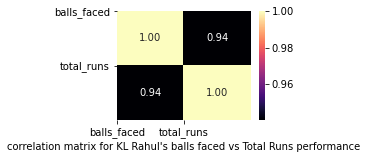

model1: (0.8845524412919186, 0.8824908777435599)


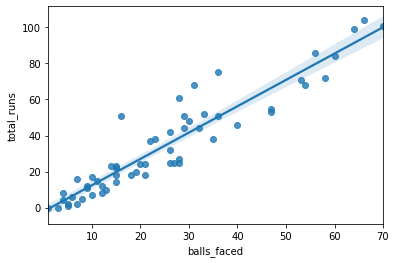

In [163]:
# let us yse KL Rahul's overall IPL strike rate matchwise
KL_reg = KL_SR[["balls_faced", "total_runs"]]
# Linear regression
corr1 = KL_reg.corr()
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(corr1, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr1.columns)), corr1.columns);
plt.yticks(range(len(corr1.columns)), corr1.columns)
plt.xlabel("correlation matrix for KL Rahul's balls faced vs Total Runs performance")
plt.show()

# Build and fit the model
import statsmodels.formula.api as smf
model1 = smf.ols("total_runs~balls_faced",data = KL_reg).fit()
sns.regplot(x="balls_faced", y="total_runs", data=KL_reg)

#R squared values
print("model1:",(model1.rsquared,model1.rsquared_adj))


In [222]:
# prediction for new values
# using the average balls faced 

#print(" balls faced against DC bowlers in powerplay\n", KL_SR_)
p_runs1 = pd.Series([20, KL_SR_.balls_faced.median(), KL_SR_.balls_faced.max(), KL_reg.balls_faced.median(), KL_reg.balls_faced.mean(), KL_reg.balls_faced.max(), t1.powerplay_runs.median(), t1.powerplay_runs.mean(), 
                     t1.powerplay_runs.max(), t2.powerplay_runs.median(),t2.powerplay_runs.mean(), t2.powerplay_runs.max() ,
                     t1.powerplay_runs.median(), KL_pp.powerplay_runs.mean()])

KL_reg_ = pd.DataFrame(p_runs1,columns=['balls_faced'])
KL_reg_["Expected_runs_by_KL_Rahul"] = model1.predict(KL_reg_)
KL_reg_["strike_rate"] = KL_reg_.Expected_runs_by_KL_Rahul *100/KL_reg_.balls_faced
#k = model1.predict(KL_reg)
#K = KL_reg[["balls_faced", "total_runs"]]
#K["predicted_runs"] = k
print("predicted output:\n",KL_reg_)
print("###########################################################################################################################")
print("frequent number of balls played by KL Rahul in powerplay are : ", KL_pp.powerplay_runs.mode()[0], "\nHence the Strike rate will be around : ", KL_reg_[KL_reg_.balls_faced == 20]["strike_rate"].unique())
print("###########################################################################################################################")


predicted output:
     balls_faced  Expected_runs_by_KL_Rahul  strike_rate
0     20.000000                  27.018377   135.091886
1      6.500000                   7.280310   112.004762
2      9.000000                  10.935507   121.505636
3     21.500000                  29.211496   135.867423
4     25.258621                  34.706897   137.406143
5     70.000000                 100.122332   143.031902
6     21.000000                  28.480456   135.621220
7     21.538462                  29.267730   135.885888
8     51.000000                  72.342829   141.848684
9     29.000000                  40.177089   138.541686
10    34.500000                  48.218524   139.763838
11    59.000000                  84.039462   142.439766
12    21.000000                  28.480456   135.621220
13    17.957447                  24.032003   133.827504
###########################################################################################################################
frequent number o

In [180]:
# let us XGboost for better accuracy
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
#X = pd.DataFrame(KL_reg["balls_faced"])
#y = pd.Series(KL_reg.total_runs)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create gradientboost regressor object
#gradientregressor = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)

# Train gradientboost Regressor
#model = gradientregressor.fit(X_train, y_train)


#predic the response for test dataset
#y_pred = model.predict(X_test)

#r2_score(y_pred, y_test)

#tuning the parameters
#from sklearn.model_selection import GridSearchCV
#LR = {'learning_rate':[0.15,0.1,0.10,0.001], 'n_estimators':[5,150,200,250]}
#tuning = GridSearchCV(estimator = GradientBoostingRegressor(),param_grid = LR, scoring ='r2')
#tuning.fit(X_train, y_train)
#tuning.best_params_, tuning.best_score_

## 2.5 : Economy rate wise analysis


In [252]:
DC_pp = deliveries[deliveries.bowler.isin(DC_bowlers)]
DC_bowlers_ER = DC_pp.groupby(['match_id', 'over','bowler'])['ball'].count().reset_index(name = "balls_bowled")
temp_er = DC_pp.groupby(['match_id', 'over', 'bowler'])['total_runs'].sum().reset_index(name = "runs_conceeded")
DC_bowlers_ER["runs_conceeded"] = temp_er.runs_conceeded
DC_bowlers_ER["economy_rate"] = (DC_bowlers_ER.runs_conceeded/DC_bowlers_ER.balls_bowled)*6

# Economy rate of DC bowlers in poer play matchwise
DC_ER_PP = DC_bowlers_ER[DC_bowlers_ER.over <=6]
for i in DC_ER_PP.bowler.unique():
    l1 = "Economy Rate of " + i + " in Powerplay (Overwise)"
    f1 = DC_ER_PP[DC_ER_PP.bowler == i].reset_index()
    fig = px.bar(f1 , x= f1.index, y='economy_rate',
             hover_data=['match_id','balls_bowled', "over", 'runs_conceeded', 'economy_rate'], color='economy_rate',title=l1)
    fig.show()

DC_bowlers_ER_ = DC_pp.groupby(['bowler'])['ball'].count().reset_index(name = "balls_bowled")
temp_er_ = DC_pp.groupby(['bowler'])['total_runs'].sum().reset_index(name = "runs_conceeded")
DC_bowlers_ER_["runs_conceeded"] = temp_er_.runs_conceeded
DC_bowlers_ER_["economy_rate"] = (DC_bowlers_ER_.runs_conceeded/DC_bowlers_ER_.balls_bowled)*6
print("Economy rates of DC Bowlers in powerplay\n",DC_bowlers_ER_)
print("################################################################################################################")
print("Average score by KL Rahul if faced by these bowlers in power play will be:",(DC_bowlers_ER_.economy_rate.mean())*100/6)
print("################################################################################################################")

Economy rates of DC Bowlers in powerplay
        bowler  balls_bowled  runs_conceeded  economy_rate
0    AR Patel          1745            2183      7.506017
1    HV Patel           868            1262      8.723502
2    K Rabada           434             599      8.281106
3  MP Stoinis           378             588      9.333333
4    R Ashwin          3016            3391      6.746021
################################################################################################################
Average score by KL Rahul if faced by these bowlers in power play will be: 135.29993346800146
################################################################################################################


## Conclusion: KL Rahul's Strike rate will be in between 122- 137 in powerplay

# Question 3: What will be Shreays Iyer's contribution to DC's total scores?

## 3.1 Contributions by all DC batsmen 

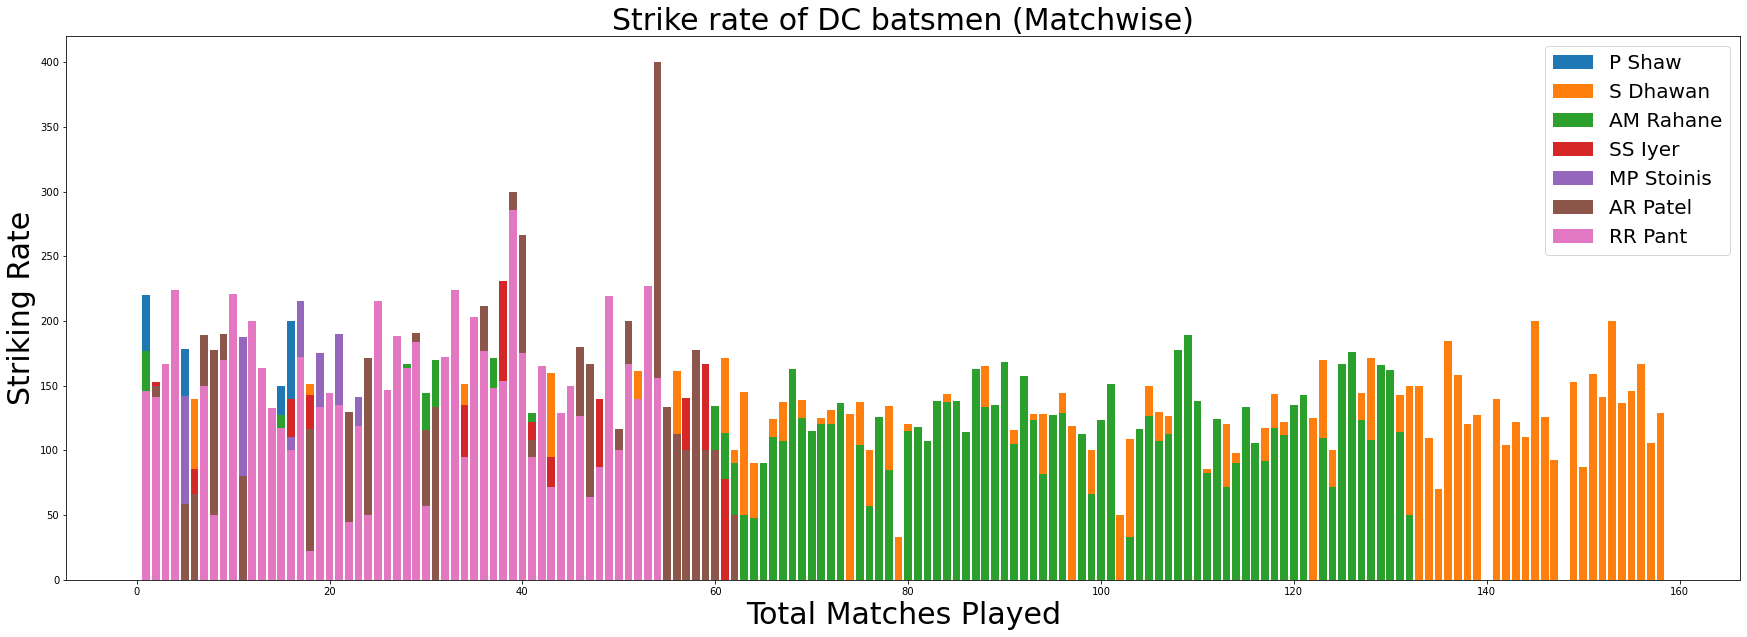

In [386]:
#['P Shaw', 'S Dhawan', 'AM Rahane', 'SS Iyer', 'MP Stoinis', 'AR Patel', 'RR Pant']
DC_scores = deliveries[deliveries.batsman.isin(DC_batsmen)]
DC_batsmen_sc = DC_scores.groupby(['match_id','batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")
temp_s = DC_scores.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index()
DC_batsmen_sc["total_runs"] = temp_s.batsman_runs
DC_batsmen_sc["strike_rate"] = (DC_batsmen_sc.total_runs)*100/DC_batsmen_sc.balls_faced

plt.figure(figsize=(30,10))
for name in DC_batsmen:
    bowler_check = DC_batsmen_sc[DC_batsmen_sc.batsman==name]
    bowler_check.index = np.arange(1, len(bowler_check) + 1)
    x=bowler_check.index
    y=bowler_check.strike_rate
    plt.bar(x,y)
    

plt.legend(DC_batsmen,prop={'size':20})
plt.title("Strike rate of DC batsmen (Matchwise)" ,fontsize=30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Striking Rate",fontsize=30)
plt.show()

# Average strikerates
DC_batsmen_sc_ = DC_batsmen_sc.groupby(['batsman'])['balls_faced', 'total_runs'].sum().reset_index()
DC_batsmen_sc_["strike_rate"] = round((DC_batsmen_sc_.total_runs)*100/DC_batsmen_sc_.balls_faced, 2)
DC_batsmen_sc_["team"] = "Delhi Capitals"
fig = px.sunburst(DC_batsmen_sc_,
                  path=["team","batsman","strike_rate",],
                  values='strike_rate',
                  width=750, height=750,
                  color_continuous_scale="BrBG",
                  color='strike_rate',
                  title="Average strike rates of DC Batsmen in IPL",
                  )
fig.show()


In [387]:
b = []
balls = []
runs = []
for i in DC_batsmen_sc.batsman.unique():
    b.append(i)
    balls.append(DC_batsmen_sc[DC_batsmen_sc.batsman ==i].balls_faced.mean())
    runs.append(DC_batsmen_sc[DC_batsmen_sc.batsman ==i].total_runs.mean())
print("######################################################################################################################")

list_of_tuples = list(zip(b, balls,runs))    
list_of_tuples   
# pandas Dataframe.  
DC_batsmen_avg = pd.DataFrame(list_of_tuples, columns = ['batsman', 'balls_faced', 'runs_scored'])  
print(DC_batsmen_avg) 
print("######################################################################################################################")


######################################################################################################################
      batsman  balls_faced  runs_scored
0    S Dhawan    23.898734    29.316456
1   AM Rahane    24.356061    29.166667
2    AR Patel    10.564516    13.000000
3     RR Pant    20.444444    33.185185
4  MP Stoinis    14.920000    19.280000
5     SS Iyer    22.459016    28.098361
6      P Shaw    17.400000    24.640000
######################################################################################################################


## 3.2  Average strike rates against KXIP bowlers

In [388]:
DC_scores_ = DC_scores[DC_scores.bowler.isin(KXIP_bowlers)]

DC_b_sc = DC_scores_.groupby(['bowler','batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")
t_s = DC_scores_.groupby(['bowler','batsman'])['batsman_runs'].sum().reset_index()
DC_b_sc["total_runs"] = t_s.batsman_runs
DC_b_sc["strike_rate"] = round((DC_b_sc.total_runs)*100/DC_b_sc.balls_faced, 2)
DC_b_sc["details"] = "DC Batsmen"
fig = px.sunburst(DC_b_sc,
                  path=["details","batsman","bowler","strike_rate",],
                  values='strike_rate',
                  width=750, height=750,
                  color_continuous_scale="Blues",
                  color='strike_rate',
                  title="Average strike rates of DC Batsmen in IPL against KXIP bowlers",
                  )
fig.show()

for i in DC_b_sc.batsman.unique():
    l1_ = "strike Rate of " + i + " against KXIP bowlers"
    f1_ = DC_b_sc[DC_b_sc.batsman == i].reset_index()
    fig = px.bar(f1_ , x= f1_.index, y='strike_rate',
             hover_data=["batsman", 'balls_faced','total_runs', 'strike_rate'], color='bowler',title=l1_)
    fig.show()

b = []
balls = []
runs = []
for i in DC_b_sc.batsman.unique():
    b.append(i)
    balls.append(DC_b_sc[DC_b_sc.batsman ==i].balls_faced.mean())
    runs.append(DC_b_sc[DC_b_sc.batsman ==i].total_runs.mean())
print("######################################################################################################################")

list_of_tuples = list(zip(b, balls,runs))    
list_of_tuples   
# pandas Dataframe.  
DC_against_KXIP_avg = pd.DataFrame(list_of_tuples, columns = ['batsman', 'balls_faced', 'runs_scored'])  
print(DC_against_KXIP_avg) 
print("######################################################################################################################")


######################################################################################################################
      batsman  balls_faced  runs_scored
0   AM Rahane    15.800000    25.200000
1    S Dhawan    19.000000    27.800000
2  MP Stoinis    10.666667    15.000000
3    AR Patel     4.500000     7.000000
4      P Shaw     6.000000     9.000000
5     RR Pant     3.000000     5.250000
6     SS Iyer    11.000000     9.333333
######################################################################################################################


## 3.3: Partnership runs

In [389]:
DC_scores_partnership = deliveries[(deliveries.batsman.isin(DC_batsmen)) & (deliveries.non_striker.isin(DC_batsmen))]
DC_scores_partnership_ = DC_scores_partnership.groupby(['batsman', 'non_striker'])['batsman_runs'].sum().reset_index()
p = DC_scores_partnership.groupby(['batsman', 'non_striker'])['batsman_runs'].count().reset_index()
DC_scores_partnership_["balls_faced"] = p.batsman_runs
DC_scores_partnership_["strike_rate"] = round((DC_scores_partnership_.batsman_runs)*100/DC_scores_partnership_.balls_faced, 2)
DC_scores_partnership_["details"] = "Partnership"
fig = px.sunburst(DC_scores_partnership_,
                  path=["details","batsman","non_striker","balls_faced","batsman_runs", "strike_rate"],
                  values='strike_rate',
                  width=750, height=750,
                  color_continuous_scale="twilight",
                  color='strike_rate',
                  title="Average strike rates of DC batsmen in partnership",
                  )
fig.show()
DC_p = DC_scores_partnership.groupby(['match_id','batsman', 'non_striker'])['batsman_runs'].sum().reset_index()
DC_p_ = DC_scores_partnership.groupby(['match_id','batsman', 'non_striker'])['batsman_runs'].count().reset_index()
DC_partnership = DC_p.groupby(['batsman', 'non_striker'])['batsman_runs'].mean().reset_index()
t_dc = DC_p_.groupby(['batsman', 'non_striker'])['batsman_runs'].mean().reset_index()
DC_partnership["balls_faced "] = t_dc.batsman_runs


##### 2nd circle = batsman, 3rd = non-striker, 4th =  balls faced, 5th = runs scored in partnership, 6th  = strike rate

In [390]:
DC_scores_partnership_

,batsman,non_striker,batsman_runs,balls_faced,strike_rate,details
0,AR Patel,MP Stoinis,19,16,118.75,Partnership
1,AR Patel,RR Pant,15,24,62.50,Partnership
2,AR Patel,S Dhawan,1,1,100.00,Partnership
3,AR Patel,SS Iyer,10,10,100.00,Partnership
4,MP Stoinis,AR Patel,16,16,100.00,Partnership
5,P Shaw,RR Pant,66,40,165.00,Partnership
6,P Shaw,S Dhawan,204,163,125.15,Partnership
7,P Shaw,SS Iyer,248,148,167.57,Partnership
8,RR Pant,AR Patel,28,19,147.37,Partnership
9,RR Pant,P Shaw,80,50,160.00,Partnership


In [391]:
print("1) Average runs scored by DC batsmen in partnership are\n",DC_partnership)
print("######################################################################################################################")
print("2) DC batsmen average balls faced and runs scored in IPL\n",DC_batsmen_avg) 
print("######################################################################################################################")
print("3) DC batsmen average balls faced and runs scored in against KXIP bowlers\n",DC_against_KXIP_avg) 
print("######################################################################################################################")


1) Average runs scored by DC batsmen in partnership are
        batsman non_striker  batsman_runs  balls_faced 
0     AR Patel  MP Stoinis      6.333333      5.333333
1     AR Patel     RR Pant      3.000000      4.800000
2     AR Patel    S Dhawan      1.000000      1.000000
3     AR Patel     SS Iyer      5.000000      5.000000
4   MP Stoinis    AR Patel      4.000000      4.000000
5       P Shaw     RR Pant     22.000000     13.333333
6       P Shaw    S Dhawan     12.750000     10.187500
7       P Shaw     SS Iyer     27.555556     16.444444
8      RR Pant    AR Patel      5.600000      3.800000
9      RR Pant      P Shaw     26.666667     16.666667
10     RR Pant    S Dhawan     27.500000     17.000000
11     RR Pant     SS Iyer     18.541667     12.416667
12    S Dhawan    AR Patel      3.000000      3.000000
13    S Dhawan      P Shaw     16.142857     10.714286
14    S Dhawan     RR Pant     19.000000     14.000000
15    S Dhawan     SS Iyer     24.125000     18.375000
16     S

In [392]:
# from 2nd observation
# total score of DC Batsmen
total_score_DC = DC_batsmen_avg.runs_scored.sum()
SS_Iyer = ((DC_batsmen_avg[DC_batsmen_avg.batsman == 'SS Iyer'].runs_scored.values[0])/total_score_DC)*100
SS_Iyer

15.902931976355337

## SS Iyer score percentage will be 12.1 to 18

# Question 4 : Wickets by KXIP bowlers in 31st to 120th ball excluding Mohammad Shami

## 4.1: wickets taken by KXIP bowlers from over 6-20

['DJ Hooda', 'GJ Maxwell', 'Mohammed Shami', 'A Singh', 'M Ashwin', 'CJ Jordan'] - [19, 39, 46, 24, 21, 9]


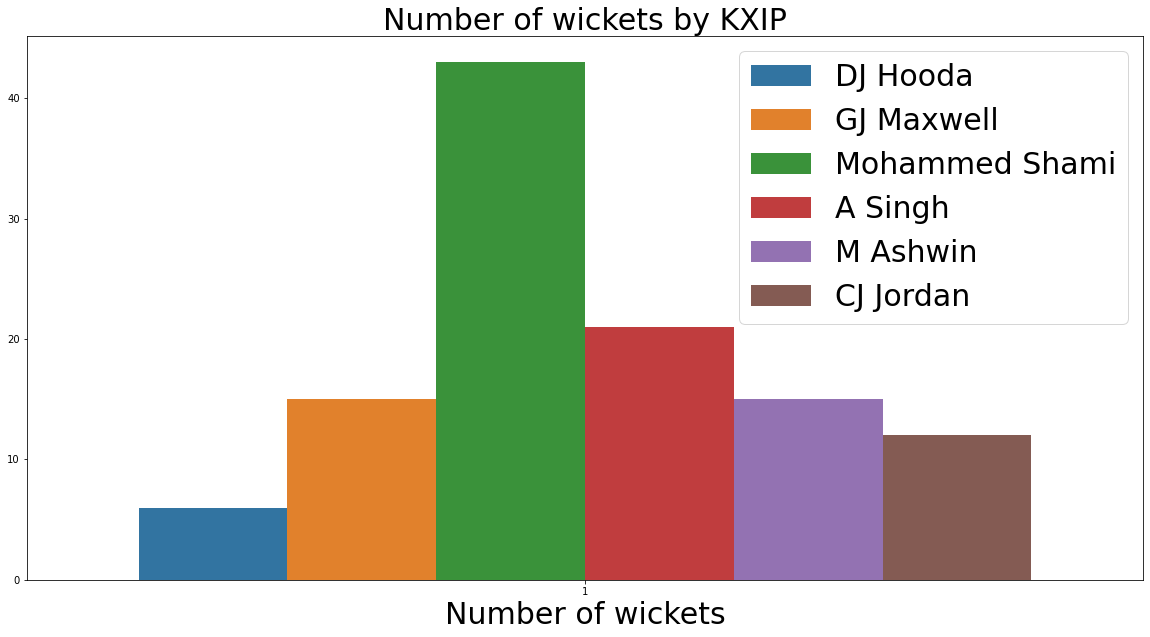

number of wickets taken by KXIP bowlers in overs 6-20
            bowler  no_of_wickets
0         A Singh             21
1       CJ Jordan             12
2        DJ Hooda              6
3      GJ Maxwell             15
4        M Ashwin             15
5  Mohammed Shami             43


In [447]:
KXIP_wickets = deliveries[(deliveries.bowler.isin(KXIP_bowlers)) & (deliveries.over > 5)]
bowler = []
match_count = []
for i in KXIP_wickets.bowler.unique():
    bowler.append(i)
    x = KXIP_wickets[KXIP_wickets.bowler == i].match_id.unique()
    match_count.append(len(x))

print(bowler,"-", match_count)

KXIP_wickets.player_dismissed.fillna(0, inplace = True)
KXIP_wickets_ = KXIP_wickets[["match_id", "bowler", "player_dismissed"]][KXIP_wickets.player_dismissed != 0]
KXIP_wickets_["wicket_count"] = 1
plt.figure(figsize=(20,10))
sns.countplot(x = "wicket_count", hue = "bowler", data = KXIP_wickets_) 
plt.legend(prop={'size':30})
plt.title("Number of wickets by KXIP",fontsize=30)
plt.xlabel("Number of wickets",fontsize=30)
plt.ylabel("",fontsize=10) 
plt.show()

KXIP_wickets1 = KXIP_wickets_.groupby(['match_id', 'bowler'])['wicket_count'].sum().reset_index(name = "no_of_wickets")
KXIP_wickets2 = KXIP_wickets1.groupby(['bowler'])['no_of_wickets'].sum().reset_index()

for i in KXIP_wickets1.bowler.unique():
    x1 = KXIP_wickets1[KXIP_wickets1.bowler==i].reset_index()
    t = "Number of wickets by " + i + " in overs 6-20 (matchwise)"
    c = px.bar(x1, x=x1.index, y = x1.no_of_wickets, 
             hover_data=['match_id','no_of_wickets'], color=x1.no_of_wickets, title=t)
    #c.update_yaxes(showticklabels=False)
    c.show()
    
print("number of wickets taken by KXIP bowlers in overs 6-20\n", KXIP_wickets2)

In [451]:
for i in KXIP_wickets1.bowler.unique():
    x1 = KXIP_wickets1[KXIP_wickets1.bowler==i]
    print("Average Wickets by ", i, " : ", x1.no_of_wickets.mean())

# 

Average Wickets by  DJ Hooda  :  1.2
Average Wickets by  GJ Maxwell  :  1.25
Average Wickets by  Mohammed Shami  :  1.4827586206896552
Average Wickets by  A Singh  :  1.3125
Average Wickets by  M Ashwin  :  1.5
Average Wickets by  CJ Jordan  :  2.4


##### Hooda will not bowl today, Bishnoi's data not available, but on an average he takes 1 wicket in middle overs, Maxwell mostly bowls in 1st 6 overs hence , his average won't be that useful
#### hence, wickets excluding M Shami would be in between 4-5


# Question 5: What will be the status of Chris Gayle's batting today?
### Options: Not out , SR<130 |  Not out, SR>130 |  Out , SR<130 |  Out, SR>130

## 5.1 Overall performace:

In [506]:
CHG = deliveries[deliveries.batsman == "CH Gayle"]
CHG.player_dismissed.fillna(0, inplace = True)
CHG1 = CHG.groupby(['match_id', 'player_dismissed'])['batsman_runs'].count().reset_index(name = "balls_faced")
CHG2 = CHG.groupby(['match_id', 'player_dismissed'])['batsman_runs'].sum().reset_index(name = "runs_scored")
CHG1["runs_scored"] = CHG2.runs_scored
CHG1["strike_rate"] = (CHG1.runs_scored)*100/CHG1.balls_faced
CHG_data = CHG1.groupby(['match_id'])['balls_faced', 'runs_scored'].sum().reset_index()
CHG_data["strike_rate"] = (CHG_data.runs_scored)*100/CHG_data.balls_faced

temp1 = CHG1[["match_id","player_dismissed"]].loc[CHG1.player_dismissed == "CH Gayle"] 

li2 = temp1.match_id.unique()
li1 = CHG1.match_id.unique()
def Diff(li1, li2):
    return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))
Gayle_not_out = Diff(li1, li2)

CHG_data1 = CHG_data[(CHG_data.match_id.isin(Gayle_not_out)) & (CHG_data.strike_rate<130)] # not out SR<130
CHG_data1["dismissal_status"] = "not_out"
CHG_data1["SR"] = "SR<130"

CHG_data1_ = CHG_data[(CHG_data.match_id.isin(Gayle_not_out)) & (CHG_data.strike_rate>130)] # not out SR>130
CHG_data1_["dismissal_status"] = "not_out"
CHG_data1_["SR"] = "SR>130"

CHG_data2 = CHG_data[CHG_data.match_id.isin(li2) & (CHG_data.strike_rate<130)] #out SR<130
CHG_data2["dismissal_status"] = "out"
CHG_data2["SR"] = "SR<130"

CHG_data2_ = CHG_data[CHG_data.match_id.isin(li2) & (CHG_data.strike_rate>130)] #out SR>130
CHG_data2_["dismissal_status"] = "out"
CHG_data2_["SR"] = "SR>130"

frames = [CHG_data1, CHG_data1_, CHG_data2, CHG_data2_]
result = pd.concat(frames)
result["batsman"] = "CH gayle"
print("Not out | SR <130 : \n\n", CHG_data1)
print("####################################################################################################################")
print("Not out | SR >130 : \n\n", CHG_data1_)
print("####################################################################################################################")
print("Out | SR <130 : \n\n",CHG_data2)
print("####################################################################################################################")
print("Out | SR >130 : \n\n", CHG_data2_)

print("####################################################################################################################")
print("Gayle's Not out and SR record")
print("Not out | SR <130 : ", CHG_data1.shape[0], " times")
print("Not out | SR >130 : ", CHG_data1_.shape[0], " times")
print("Out | SR <130 : ",CHG_data2.shape[0], " times")
print("Out | SR >130 : ", CHG_data2_.shape[0], " times")
print("####################################################################################################################")

fig = px.sunburst(result,
                  path=["batsman","SR","dismissal_status"],
                  values='strike_rate',
                  width=750, height=750,
                  color_continuous_scale="twilight",
                  color='strike_rate',
                  title="Average strike rate and Dismissal Status of Gayle in IPL",
                  )
fig.show()

Not out | SR <130 : 

      match_id  balls_faced  runs_scored  strike_rate dismissal_status      SR
56        407           49           49        100.0          not_out  SR<130
87        571            5            1         20.0          not_out  SR<130
106      7933            2            2        100.0          not_out  SR<130
####################################################################################################################
Not out | SR >130 : 

      match_id  balls_faced  runs_scored  strike_rate dismissal_status      SR
10        123           29           44   151.724138          not_out  SR>130
25        258           57          102   178.947368          not_out  SR>130
30        288           44           70   159.090909          not_out  SR>130
33        302           54           75   138.888889          not_out  SR>130
46        360           59           82   138.983051          not_out  SR>130
49        372           62          128   206.451613     

## 5.2 Against DC Bowlers

In [501]:
CHG_ = deliveries[(deliveries.batsman == "CH Gayle") & (deliveries.bowler.isin(DC_bowlers)) ]
CHG_.player_dismissed.fillna(0, inplace = True)
CHG1_ = CHG_.groupby(['match_id', 'player_dismissed'])['batsman_runs'].count().reset_index(name = "balls_faced")
CHG2_ = CHG_.groupby(['match_id', 'player_dismissed'])['batsman_runs'].sum().reset_index(name = "runs_scored")
CHG1_["runs_scored"] = CHG2_.runs_scored
CHG1_["strike_rate"] = (CHG1_.runs_scored)*100/CHG1_.balls_faced
CHG_data_ = CHG1_.groupby(['match_id'])['balls_faced', 'runs_scored'].sum().reset_index()
CHG_data_["strike_rate"] = (CHG_data_.runs_scored)*100/CHG_data_.balls_faced

temp1_ = CHG1_[["match_id","player_dismissed"]].loc[CHG1_.player_dismissed == "CH Gayle"] 

li2_ = temp1_.match_id.unique()
li1_ = CHG1_.match_id.unique()
def Diff_(li1_, li2_):
    return (list(list(set(li1_)-set(li2_)) + list(set(li2_)-set(li1_))))
Gayle_not_out_ = Diff_(li1_, li2_)

CHG_data1_ = CHG_data_[(CHG_data_.match_id.isin(Gayle_not_out_)) & (CHG_data_.strike_rate<130)] # not out SR<130
CHG_data1_["dismissal_status"] = "not_out"

CHG_data1_1 = CHG_data_[(CHG_data_.match_id.isin(Gayle_not_out_)) & (CHG_data_.strike_rate>130)] # not out SR>130
CHG_data1_1["dismissal_status"] = "not_out"

CHG_data2_ = CHG_data_[CHG_data_.match_id.isin(li2) & (CHG_data_.strike_rate<130)] #out SR<130
CHG_data2_["dismissal_status"] = "out"

CHG_data2_2 = CHG_data_[CHG_data_.match_id.isin(li2) & (CHG_data_.strike_rate>130)] #out SR>130
CHG_data2_2["dismissal_status"] = "out"


frames_ = [CHG_data1_, CHG_data1_1, CHG_data2, CHG_data2_2]
result_ = pd.concat(frames_)

print("Not out | SR <130 : \n\n", CHG_data1)
print("####################################################################################################################")
print("Not out | SR >130 : \n\n", CHG_data1_1)
print("####################################################################################################################")
print("Out | SR <130 : \n\n",CHG_data2_)
print("####################################################################################################################")
print("Out | SR >130 : \n\n", CHG_data2_2)

print("####################################################################################################################")
print("Gayle's Not out and SR record")
print("####################################################################################################################")

print("Not out | SR <130 : ", CHG_data1.shape[0], " times")
print("Not out | SR >130 : ", CHG_data1_1.shape[0], " time")
print("Out | SR <130 : ",CHG_data2_.shape[0], " times")
print("Out | SR >130 : ", CHG_data2_2.shape[0], " times")
print("####################################################################################################################")


Not out | SR <130 : 

      match_id  balls_faced  runs_scored  strike_rate dismissal_status
56        407           49           49        100.0          not_out
87        571            5            1         20.0          not_out
106      7933            2            2        100.0          not_out
####################################################################################################################
Not out | SR >130 : 

    match_id  balls_faced  runs_scored  strike_rate dismissal_status
4       320            7           11   157.142857          not_out
####################################################################################################################
Out | SR <130 : 

     match_id  balls_faced  runs_scored  strike_rate dismissal_status
3        307            3            0     0.000000              out
5        452            3            1    33.333333              out
6        499           14            9    64.285714              out
8        

## 5.3 Performance in mid and death overs
#### According to batting order Gayle will face overs after 6

In [510]:
CHG1 = deliveries[(deliveries.batsman == "CH Gayle") & (deliveries.over >=6)]
CHG1.player_dismissed.fillna(0, inplace = True)
CHG11 = CHG1.groupby(['match_id', 'player_dismissed'])['batsman_runs'].count().reset_index(name = "balls_faced")
CHG22 = CHG1.groupby(['match_id', 'player_dismissed'])['batsman_runs'].sum().reset_index(name = "runs_scored")
CHG11["runs_scored"] = CHG22.runs_scored
CHG11["strike_rate"] = (CHG11.runs_scored)*100/CHG11.balls_faced
CHG_data1 = CHG11.groupby(['match_id'])['balls_faced', 'runs_scored'].sum().reset_index()
CHG_data1["strike_rate"] = (CHG_data1.runs_scored)*100/CHG_data1.balls_faced

temp11 = CHG11[["match_id","player_dismissed"]].loc[CHG11.player_dismissed == "CH Gayle"] 

li22 = temp11.match_id.unique()
li11 = CHG11.match_id.unique()
def Diff(li11, li22):
    return (list(list(set(li11)-set(li22)) + list(set(li22)-set(li11))))
Gayle_not_out1 = Diff(li11, li22)

CHG_data11 = CHG_data1[(CHG_data1.match_id.isin(Gayle_not_out1)) & (CHG_data1.strike_rate<130)] # not out SR<130
CHG_data11["dismissal_status"] = "not_out"
CHG_data11["SR"] = "SR<130"

CHG_data11_ = CHG_data1[(CHG_data1.match_id.isin(Gayle_not_out1)) & (CHG_data1.strike_rate>130)] # not out SR>130
CHG_data11_["dismissal_status"] = "not_out"
CHG_data11_["SR"] = "SR>130"

CHG_data22 = CHG_data1[CHG_data1.match_id.isin(li2) & (CHG_data1.strike_rate<130)] #out SR<130
CHG_data22["dismissal_status"] = "out"
CHG_data22["SR"] = "SR<130"

CHG_data22_ = CHG_data1[CHG_data1.match_id.isin(li2) & (CHG_data1.strike_rate>130)] #out SR>130
CHG_data22_["dismissal_status"] = "out"
CHG_data22_["SR"] = "SR>130"


frames1 = [CHG_data11, CHG_data11_, CHG_data22, CHG_data22_]
result1 = pd.concat(frames1)
result1["batsman"] = "Gayle against DC bowlers"

print("Not out | SR <130 : \n\n", CHG_data11)
print("####################################################################################################################")
print("Not out | SR >130 : \n\n", CHG_data11_)
print("####################################################################################################################")
print("Out | SR <130 : \n\n",CHG_data22)
print("####################################################################################################################")
print("Out | SR >130 : \n\n", CHG_data22_)

print("####################################################################################################################")
print("Gayle's Not out and SR record")
print("Not out | SR <130 : ", CHG_data11.shape[0], " times")
print("Not out | SR >130 : ", CHG_data11_.shape[0], " times")
print("Out | SR <130 : ",CHG_data22.shape[0], " times")
print("Out | SR >130 : ", CHG_data22_.shape[0], " times")
print("####################################################################################################################")



Not out | SR <130 : 

     match_id  balls_faced  runs_scored  strike_rate dismissal_status      SR
32       407           32           34       106.25          not_out  SR<130
####################################################################################################################
Not out | SR >130 : 

     match_id  balls_faced  runs_scored  strike_rate dismissal_status      SR
5        123            9           12   133.333333          not_out  SR>130
13       258           45           82   182.222222          not_out  SR>130
17       288           32           53   165.625000          not_out  SR>130
18       302           41           54   131.707317          not_out  SR>130
27       360           42           67   159.523810          not_out  SR>130
29       372           50          119   238.000000          not_out  SR>130
30       383           53           89   167.924528          not_out  SR>130
31       392           43           73   169.767442          not_ou

## 5.4 performance in mid and death overs against DC bowlers

In [504]:
CHG1_ = deliveries[(deliveries.batsman == "CH Gayle") & (deliveries.over >=6) & (deliveries.bowler.isin(DC_bowlers))]
CHG1_.player_dismissed.fillna(0, inplace = True)
CHG11_ = CHG1_.groupby(['match_id', 'player_dismissed'])['batsman_runs'].count().reset_index(name = "balls_faced")
CHG22_ = CHG1_.groupby(['match_id', 'player_dismissed'])['batsman_runs'].sum().reset_index(name = "runs_scored")
CHG11_["runs_scored"] = CHG22_.runs_scored
CHG11_["strike_rate"] = (CHG11_.runs_scored)*100/CHG11_.balls_faced
CHG_data1_ = CHG11_.groupby(['match_id'])['balls_faced', 'runs_scored'].sum().reset_index()
CHG_data1_["strike_rate"] = (CHG_data1_.runs_scored)*100/CHG_data1_.balls_faced

temp11_ = CHG11_[["match_id","player_dismissed"]].loc[CHG11_.player_dismissed == "CH Gayle"] 

li22_ = temp11_.match_id.unique()
li11_ = CHG11_.match_id.unique()
def Diff(li11_, li22_):
    return (list(list(set(li11_)-set(li22_)) + list(set(li22_)-set(li11_))))
Gayle_not_out1_ = Diff(li11_, li22_)

CHG_data11_ = CHG_data1_[(CHG_data1_.match_id.isin(Gayle_not_out1_)) & (CHG_data1_.strike_rate<130)] # not out SR<130
CHG_data11_["dismissal_status"] = "not_out"

CHG_data11_1 = CHG_data1_[(CHG_data1_.match_id.isin(Gayle_not_out1_)) & (CHG_data1_.strike_rate>130)] # not out SR>130
CHG_data11_1["dismissal_status"] = "not_out"

CHG_data22_ = CHG_data1_[CHG_data1_.match_id.isin(li2_) & (CHG_data1_.strike_rate<130)] #out SR<130
CHG_data22_["dismissal_status"] = "out"

CHG_data22_2 = CHG_data1_[CHG_data1_.match_id.isin(li2_) & (CHG_data1_.strike_rate>130)] #out SR>130
CHG_data22_2["dismissal_status"] = "out"


frames1_ = [CHG_data11_, CHG_data11_1, CHG_data22_, CHG_data22_2]
result1_ = pd.concat(frames1_)

print("Not out | SR <130 : \n\n", CHG_data11_)
print("####################################################################################################################")
print("Not out | SR >130 : \n\n", CHG_data11_1)
print("####################################################################################################################")
print("Out | SR <130 : \n\n",CHG_data22_)
print("####################################################################################################################")
print("Out | SR >130 : \n\n", CHG_data22_2)

print("####################################################################################################################")
print("Gayle's Not out and SR record")
print("Not out | SR <130 : ", CHG_data11_.shape[0], " times")
print("Not out | SR >130 : ", CHG_data11_1.shape[0], " times")
print("Out | SR <130 : ",CHG_data22_.shape[0], " times")
print("Out | SR >130 : ", CHG_data22_2.shape[0], " times")
print("####################################################################################################################")


Not out | SR <130 : 

    match_id  balls_faced  runs_scored  strike_rate dismissal_status
0       302            4            2    50.000000          not_out
4       575            2            1    50.000000          not_out
6     11328            7            6    85.714286          not_out
####################################################################################################################
Not out | SR >130 : 

    match_id  balls_faced  runs_scored  strike_rate dismissal_status
1       320            3            6        200.0          not_out
####################################################################################################################
Out | SR <130 : 

    match_id  balls_faced  runs_scored  strike_rate dismissal_status
2       499           10            7         70.0              out
####################################################################################################################
Out | SR >130 : 

    match_id  balls_fa

In [511]:
fig = px.sunburst(result1,
                  path=["batsman","SR","dismissal_status"],
                  values='strike_rate',
                  width=750, height=750,
                  color_continuous_scale="twilight",
                  color='strike_rate',
                  title="Average strike rate and Dismissal Status of Gayle in IPL",
                  )
fig.show()

##  from above analysis, Answer = Out,  SR>130

# Question 1: Who will win the match?


In [512]:
# data cleaning
matches.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

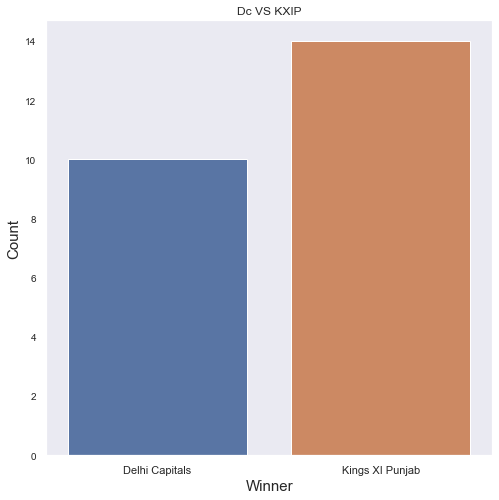

In [516]:
match_ = matches[((matches.team1 == "Delhi Capitals") &(matches.team2 == "Kings XI Punjab")) | ((matches.team1 == "Kings XI Punjab") &(matches.team2 == "Delhi Capitals"))]
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(8,8)

sns.countplot(x="winner",data=match_)
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=10)
plt.title('Dc VS KXIP')
plt.show()

In [518]:
matches.venue.unique()

array(['Rajiv Gandhi International Stadium',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M. Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla', 'Punjab Cricket Association Stadium',
       'Green Park', 'Sawai Mansingh Stadium', 'M.A. Chidambaram Stadium',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'She

In [519]:
venue = 'Dubai International Cricket Stadium'
#venuewise DC
match_DC = matches[(matches.venue == venue) & ((matches.team1 == "Delhi Capitals") | (matches.team2 == "Delhi Capitals"))]
match_DC

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN


### Delhi capitals wom 1 match here

In [520]:
venue = 'Dubai International Cricket Stadium'
#venuewise KXIP
match_KXIP = matches[(matches.venue == venue) & ((matches.team1 == "Kings XI Punjab") | (matches.team2 == "Kings XI Punjab"))]
match_KXIP

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN


#### KXIP also won 1 match here.

## From above analysis KXIP will be the winner in today's match